<a name="index"></a>
<h1 align="center">Análise de Dados Eleitorais</h1>
______________________________________________________________________________________________________________________________

# 1 - Introdução e Objetivo do Projeto

Este notebook tem objetivo de proporcionar um ambiente de análise de dados eleitorais.

## Objetivo das análises
* [01 - Mostrar a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária, além da quantidade de eleitores que utilizam nome social;](#analysis_1)


* [02 - Relacionar as características do eleitorado de acordo com o representante eleito em determinada região;](#analysis_2)


* [03- Mostrar a renda média do eleitorado de determinada região;](#analysis_3)


* [04 - Mostrar, daquela região, a cidade com mais eleitores jovem e mais eleitores idosos;](#analysis_4)


* [05 - Comparar a renda média de eleitores do Vale do Paraíba com a de outras regiões do Estado;](#analysis_5)


* [06 - Automatizar a exportação das estatísticas;](#analysis_6)


* [07 - Relacionar características do eleitorado de acordo com o representante eleito em determinada região de eleições futuras;](#analysis_7)


* [08 - Mostrar a percentagem de eleitores ausentes da última eleição;](#analysis_8)


* [09 - Mostrar a evolução do número de eleitores;](#analysis_9)


* [10 - Análise de dados feita em Jupyter Notebook.](#analysis_10)

<a name="dev"></a>
# 2 - Preparativos
[Back to the top](#index)

Instale as dependências deste projeto através do comando:

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Importando as libs necessarias para rodar o projeto:

In [2]:
# libs para análise de dados + graficos
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt

# libs auxiliares
import os
from os import walk
import datetime

print("Importações e configurações concluídas ✔️ ")

Importações e configurações concluídas ✔️ 


# 3 - Getting started
[Back to the top](#index)
## 3.1 Configuração: Região de Estudo

### 3.1.1 Macroregiões

Para orientar-se por macrorregiões é possível escolher um município ou uma lista de municípios. Para o exemplo iremos colocar as regiões do Vale do Paraíba, Vale Histórico, Litoral Norte, Serra da Mantiqueira e Região Brangantina:

In [3]:
macro_regiao = {
    "VALE DO PARAÍBA": [
        "APARECIDA",
        "CAÇAPAVA",
        "CACHOEIRA PAULISTA",
        "CANAS",
        "CUNHA",
        "GUARATINGUETÁ",
        "IGARATÁ",
        "JACAREÍ",
        "JAMBEIRO",
        "LAGOINHA",
        "LORENA",
        "NATIVIDADE DA SERRA",
        "PARAIBUNA",
        "PINDAMONHANGABA",
        "PIQUETE",
        "POTIM",
        "REDENÇÃO DA SERRA",
        "ROSEIRA",
        "SANTA BRANCA",
        "SÃO JOSÉ DOS CAMPOS",
        "SÃO LUÍS DO PARAITINGA",
        "TAUBATÉ",
        "TREMEMBÉ"
    ],
    "VALE HISTÓRICO": [
        "ARAPEÍ",
        "AREIAS",
        "BANANAL",
        "CRUZEIRO",
        "LAVRINHAS",
        "QUELUZ",
        "SÃO JOSÉ DO BARREIRO",
        "SILVEIRAS"
    ],
    "LITORAL NORTE": [
        "ILHABELA",
        "SÃO SEBASTIÃO",
        "UBATUBA",
        "CAMPOS DO JORDÃO",
        "MONTEIRO LOBATO",
        "SANTO ANTÔNIO DO PINHAL",
        "SÃO BENTO DO SAPUCAÍ"
    ],
    "REGIÃO BRAGANTINA": [
        "BOM JESUS DOS PERDÕES",
        "BRAGANÇA PAULISTA",
        "JOANÓPOLIS",
        "NAZARÉ PAULISTA",
        "PIRACAIA",
        "VARGEM"
    ]
}

### 3.1.2 Municípios foco
[Back to the top](#index)


As variáveis `municipio_1`, `municipio_2` e `municipio_3` guardarão o nome dos municípios que terão mais foco durante a análise. Tome cuidado com a escrita: o município deve ser declarado com a **acentuação e espaçamento corretos**, além de estar **entre aspas**!


In [4]:
all_cities_cobertura_vanguarda = []

for regiao in macro_regiao:
    all_cities_cobertura_vanguarda+= macro_regiao[regiao]

print(all_cities_cobertura_vanguarda)

['APARECIDA', 'CAÇAPAVA', 'CACHOEIRA PAULISTA', 'CANAS', 'CUNHA', 'GUARATINGUETÁ', 'IGARATÁ', 'JACAREÍ', 'JAMBEIRO', 'LAGOINHA', 'LORENA', 'NATIVIDADE DA SERRA', 'PARAIBUNA', 'PINDAMONHANGABA', 'PIQUETE', 'POTIM', 'REDENÇÃO DA SERRA', 'ROSEIRA', 'SANTA BRANCA', 'SÃO JOSÉ DOS CAMPOS', 'SÃO LUÍS DO PARAITINGA', 'TAUBATÉ', 'TREMEMBÉ', 'ARAPEÍ', 'AREIAS', 'BANANAL', 'CRUZEIRO', 'LAVRINHAS', 'QUELUZ', 'SÃO JOSÉ DO BARREIRO', 'SILVEIRAS', 'ILHABELA', 'SÃO SEBASTIÃO', 'UBATUBA', 'CAMPOS DO JORDÃO', 'MONTEIRO LOBATO', 'SANTO ANTÔNIO DO PINHAL', 'SÃO BENTO DO SAPUCAÍ', 'BOM JESUS DOS PERDÕES', 'BRAGANÇA PAULISTA', 'JOANÓPOLIS', 'NAZARÉ PAULISTA', 'PIRACAIA', 'VARGEM']


In [5]:
# Informe os municípios para análise
municipio_1 = "CAÇAPAVA"
municipio_2 = "TAUBATÉ"            
municipio_3 = "SÃO JOSÉ DOS CAMPOS"            

# Checando se você digitou corretamente
if(set([municipio_1.upper(),municipio_2.upper(),municipio_3.upper()]).issubset(set(all_cities_cobertura_vanguarda))):
    print(f"Municípios OK ✔️")
else:
    print("❌ Município com nome incorreto, tente novamente!")

Municípios OK ✔️


### 3.2 Configuração: Ano eleitoral

[Back to the top](#index)

Para análises de apenas um município, temos à disposição os dados das eleições de 2018 e 2020. Abaixo as características das eleições que ocorreram nestes anos:

ANO  | TIPO DE ELEIÇÃO    | CARGOS                  |
:----|:-------------------|:------------------------|
2018 | Federal e Estadual | Presidente e Governador |
2020 | Municipal          | Prefeito                |

A variável `eleicao_ano` guarda o ano escolhido para as análises!<br>

In [34]:
# Informe o ano para análise
eleicao_ano = 2020

# listagem de anos eleitorais para cada 'tipo'
anos_eleicoes_federal = np.arange(1994, datetime.date.today().year+10, 4).tolist()
anos_eleicoes_municipal = np.arange(1996, datetime.date.today().year+10, 4).tolist()

if eleicao_ano in anos_eleicoes_federal or eleicao_ano in anos_eleicoes_municipal:
   print(f"Ano eleitoral {eleicao_ano} escolhido com sucesso ✔️")
else:
    print("❌ O ano escolhido não é um ano de eleição! Volte ao início do notebook, altere o ano e rode aquela e esta célula novamente")
    

Ano eleitoral 2022 escolhido com sucesso ✔️


<a name="export_to_csv"></a>
### 3.3 Configuração: Export to CSV

[Back to the top](#index)

Está variavél visa gravar se o usuário deseja ou não exportar os dataframes criados para um csv.

Caso seja colocado como 's' ('sim'), ao rodar uma analise um csv será gerado na pasta `exported_csv`.  
Por padrão deixamos como 'n' para **não** gerar estes csv's.


In [7]:
EXPORT_TO_CSV = 'N'
EXPORT_TO_CSV = EXPORT_TO_CSV.upper()

### 3.4 Check list Arquivos de Dados (.csv)

[Back to the top](#index)

Os dados que utilizados podem ser obtidos a partir do [IBGE - Instituto Brasileiro de Geografia e Estatística](https://cidades.ibge.gov.br/brasil/sp/sao-jose-dos-campos/pesquisa/19/29765?localidade1=355410&localidade2=355030) e do [TSE - Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais). <br>

**Arquivo sobre renda média dos municípios:**
- cadastro_central_de_empresas.csv

**Arquivos dos candidatos:**
- consulta_cand_2018_BRASIL.csv
- consulta_cand_2020_SP.csv
- (arquivos de eleições futuras 2022, 2024,etc. conforme requisito 4.7)

**Arquivos sobre a evolução da quantiade de eleitores:**
- eleitorado_municipio_2014.csv
- eleitorado_municipio_2016.csv
- eleitorado_municipio_2018.csv
- eleitorado_municipio_2020.csv
- (arquivos de eleições futuras 2022, 2024,etc. conforme requisito 4.7)

**Arquivos sobre comparecimento e abstenção dos eleitores:**
- perfil_comparecimento_abstencao_2018.csv
- perfil_comparecimento_abstencao_2020.csv
- (arquivos de eleições futuras 2022, 2024,etc. conforme requisito 4.7)

**Arquivos do eleitorado:**
- perfil_eleitorado_2018.csv
- perfil_eleitorado_2020.csv
- (arquivos de eleições futuras 2022, 2024,etc. conforme requisito 4.7)

### <font color='red'>**IMPORTANTE:**</font> Para ter os <i>.csv</i> mencionados disponíveis, você precisa ter todos os arquivos <i>.zip</i> descompactados dentro da pasta <b>\data</b> antes de seguir os próximos passos. 
### <font color='red'>**ATENÇÃO:**</font> As análises deste notebook são passíveis de atualização, mas para fazer análises de anos futuros é necessário colocar os novos <i>.csv</i> descompactados juntamente com os já presentes.

Para este projeto rodar é necessario ter arquivos de dados especificos no formato *.csv* na pasta */data* .
A célula a seguir analisa se todos os arquivos necessarios estão presentes de acordo com o ano escolhido na variável: `eleicao_ano`.

In [38]:
# verificando quantos CSVs com o ano escolhido existem na pasta "/data"
data_folder = 'data'

files = os.listdir('data')
missing = 0
if f'eleitorado_municipio_{eleicao_ano}.csv' not in files:
    print(f'Está faltando o arquivo: eleitorado_municipio_{eleicao_ano}.csv')
    missing = 1
if f'perfil_eleitorado_{eleicao_ano}.csv' not in files:
    print(f'Esta faltando o arquivo: perfil_eleitorado_{eleicao_ano}.csv')
    missing = 1
if f'perfil_comparecimento_abstencao_{eleicao_ano}.csv' not in files:
    print(f'Esta faltando o arquivo: perfil_comparecimento_abstencao_{eleicao_ano}.csv')
    missing = 1
if eleicao_ano in anos_eleicoes_federal:
    if f'consulta_cand_{eleicao_ano}_BRASIL.csv' not in files:
        print(f'Esta faltando o arquivo: consulta_cand_{eleicao_ano}_BRASIL.csv')
        missing = 1
    if f'despesas_contratadas_candidatos_{eleicao_ano}_BR.csv' not in files:
        print(f'Esta faltando o arquivo: despesas_contratadas_candidatos_{eleicao_ano}_BRASIL.csv')
        missing = 1
else:
    if f'consulta_cand_{eleicao_ano}_SP.csv' not in files:
        print(f'Esta faltando o arquivo: consulta_cand_{eleicao_ano}_SP.csv')
        missing = 1
    if f'despesas_contratadas_candidatos_{eleicao_ano}_SP.csv' not in files:
        print(f'Esta faltando o arquivo: despesas_contratadas_candidatos_{eleicao_ano}_SP.csv')
        missing = 1


if missing == 0:
    # caso todos os CSVs necessários estejam na pasta
    print("O ano escolhido está disponível e com todos os CSVs necessários para as análises!")


O ano escolhido está disponível e com todos os CSVs necessários para as análises!


### 3.5 Carregamento dos dados

[Back to the top](#index)

Para deixar o processo mais rápido, vamos carregar apenas as informações necessárias dentro de uma infinidade de dados que teremos acesso. <br>

In [39]:
def build_path(filename):
    return fr'./{data_folder}/{filename}'

def build_df(filename, usecols=[]):
    if filename == 'cadastro_central_de_empresas.csv':
        return pd.read_csv(
            build_path(filename),
            sep= ';',
            on_bad_lines='skip')  
    if usecols == []:
        return pd.read_csv(
            build_path(filename),
            sep= ';',
            on_bad_lines='skip',
            encoding='iso-8859-1')
    else:
        return pd.read_csv(
            build_path(filename),
            sep= ';',
            usecols=usecols,
            on_bad_lines='skip',
            encoding='iso-8859-1')

In [40]:
# filtro de colunas
col_candidatos = ["NR_TURNO", "NM_UE", "DS_CARGO", "NM_CANDIDATO", "SG_PARTIDO", "DS_SIT_TOT_TURNO"]
col_eleitorado = ["NR_ANO_ELEICAO", "SG_UF", "NM_MUNICIPIO", "QTD_ELEITORES"]
col_perfil_eleitorado = [
    "ANO_ELEICAO", "SG_UF", "NM_MUNICIPIO", "DS_ESTADO_CIVIL", "CD_FAIXA_ETARIA", "DS_FAIXA_ETARIA", 
    "CD_GRAU_ESCOLARIDADE", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL", 
    "QT_ELEITORES_INC_NM_SOCIAL", "DS_GENERO", "QT_ELEITORES_BIOMETRIA"]
col_abstencao = ["NR_TURNO", "NM_MUNICIPIO", "QT_APTOS", "QT_COMPARECIMENTO", "QT_ABSTENCAO"]
col_despesas = ["NM_UE", "DS_CARGO", "NM_CANDIDATO", "VR_DESPESA_CONTRATADA" ]

In [42]:
# Carregando os Dataframes

df_renda_mun = build_df('cadastro_central_de_empresas.csv')
df_eleitorado_2014 = build_df('eleitorado_municipio_2014.csv',col_eleitorado)
df_eleitorado_2016 = build_df('eleitorado_municipio_2016.csv',col_eleitorado)
df_eleitorado_2018 = build_df('eleitorado_municipio_2018.csv',col_eleitorado)
df_eleitorado_2020 = build_df('eleitorado_municipio_2020.csv',col_eleitorado)
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    df_eleitorado_2022 = build_df('eleitorado_municipio_2022.csv',col_eleitorado)
if eleicao_ano >= 2024:
    df_eleitorado_2024 = build_df('eleitorado_municipio_2024.csv',col_eleitorado)
df_perfil_eleitorado = build_df(f'perfil_eleitorado_{eleicao_ano}.csv', col_perfil_eleitorado)
df_abstencao = build_df(f'perfil_comparecimento_abstencao_{eleicao_ano}.csv', col_abstencao)


if eleicao_ano in anos_eleicoes_federal:
    df_candidatos = build_df(f'consulta_cand_{eleicao_ano}_BRASIL.csv', col_candidatos)
    df_despesas = build_df(f'despesas_contratadas_candidatos_{eleicao_ano}_BR.csv', col_despesas)
else:
    df_candidatos = build_df(f'consulta_cand_{eleicao_ano}_SP.csv', col_candidatos)
    df_despesas = build_df(f'despesas_contratadas_candidatos_{eleicao_ano}_SP.csv', col_despesas)

print('dfs carregados com sucesso!')

dfs carregados com sucesso!


# 4 - Análises
[Back to the top](#index)

Configs para os graficos

In [43]:
title_font={'fontweight':'bold','fontsize':22}
label_font={'fontweight':'bold','fontsize':16}

# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')

<a name="analysis_1"></a>
## 4.1 - Mostrar a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária, além da quantidade de eleitores que utilizam nome social 

[Back to the top](#index)


In [44]:
marital_status_totals = df_perfil_eleitorado.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().reset_index()
marital_status_totals['PCTG'] = (marital_status_totals.QT_ELEITORES_PERFIL / marital_status_totals.QT_ELEITORES_PERFIL.sum()) * 100
marital_status_totals = marital_status_totals.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
marital_status_totals

,DS_ESTADO_CIVIL,QT_ELEITORES_PERFIL,PCTG
4,SOLTEIRO,84630900,57.214554
0,CASADO,51575693,34.867646
1,DIVORCIADO,5719757,3.866830
5,VIÚVO,4309584,2.913486
3,SEPARADO JUDICIALMENTE,1623642,1.097660
2,NÃO INFORMADO,58907,0.039824


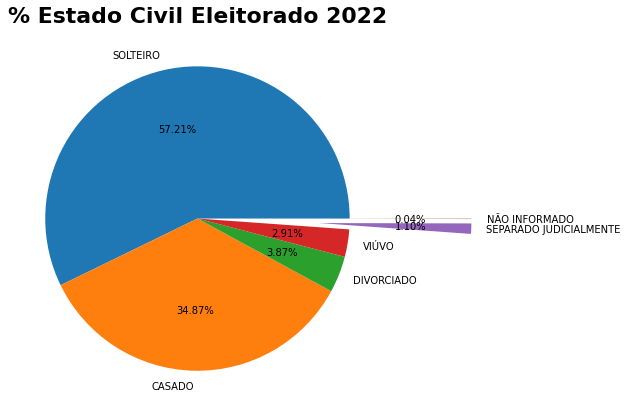

In [45]:
plt.figure(figsize=(15,7))
plt.title(f'% Estado Civil Eleitorado {eleicao_ano}',fontdict=title_font)
explode = [0, 0, 0, 0,0.8,0.8]

plt.pie(marital_status_totals['PCTG'], labels=marital_status_totals['DS_ESTADO_CIVIL'], 
        autopct='%2.2f%%', explode=explode)

plt.show()

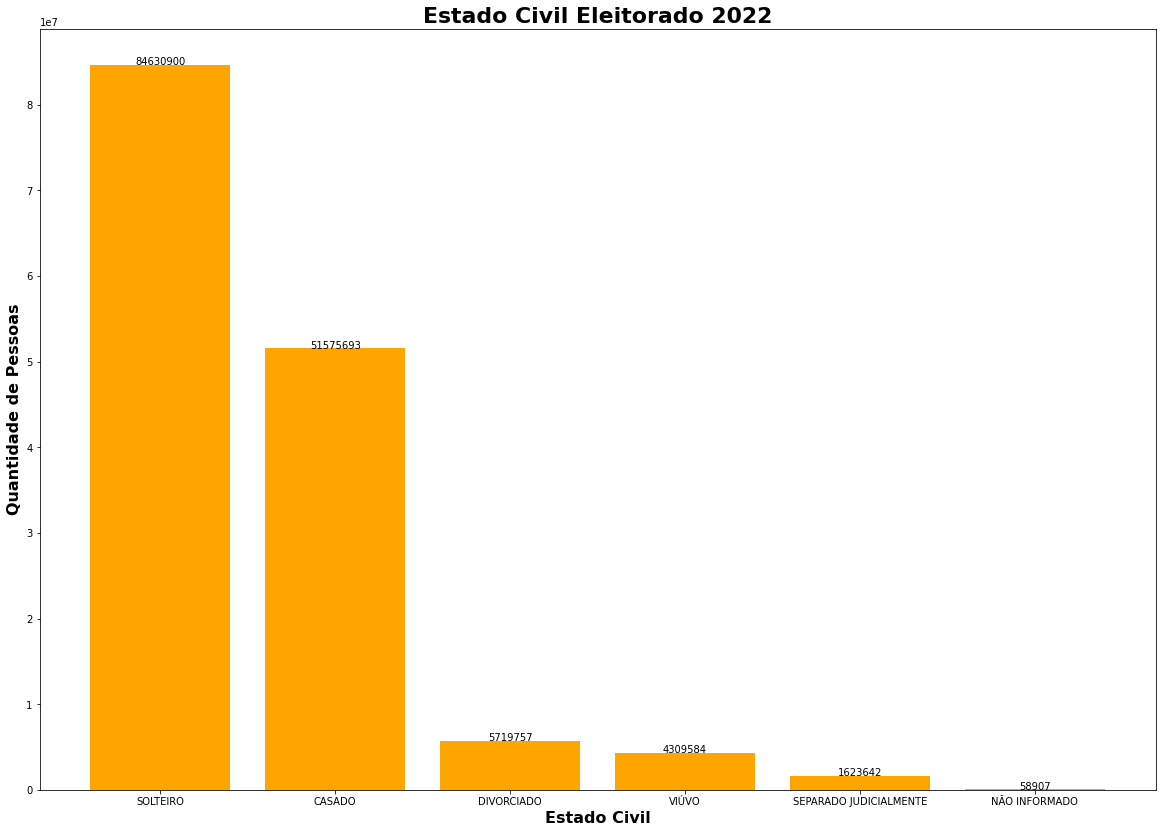

In [106]:
plt.figure(figsize=(20,14))
x = marital_status_totals['DS_ESTADO_CIVIL'].to_list()
y = marital_status_totals['QT_ELEITORES_PERFIL'].to_list()
plt.bar(x,y,color='orange')

add_labels(x, y)
plt.title(f'Estado Civil Eleitorado {eleicao_ano}',fontdict=title_font)
plt.xlabel('Estado Civil',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.show()

In [46]:
schooling_totals = df_perfil_eleitorado.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum().reset_index()
schooling_totals['PCTG'] = (schooling_totals.QT_ELEITORES_PERFIL / schooling_totals.QT_ELEITORES_PERFIL.sum()) * 100
schooling_totals = schooling_totals.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
schooling_totals

,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,PCTG
3,ENSINO MÉDIO COMPLETO,37681635,25.474595
2,ENSINO FUNDAMENTAL INCOMPLETO,35771791,24.183449
4,ENSINO MÉDIO INCOMPLETO,22900434,15.481793
7,SUPERIOR COMPLETO,15800520,10.681911
5,LÊ E ESCREVE,11574213,7.824724
1,ENSINO FUNDAMENTAL COMPLETO,9859257,6.665331
8,SUPERIOR INCOMPLETO,7723245,5.221285
0,ANALFABETO,6572249,4.443156
6,NÃO INFORMADO,35139,0.023756


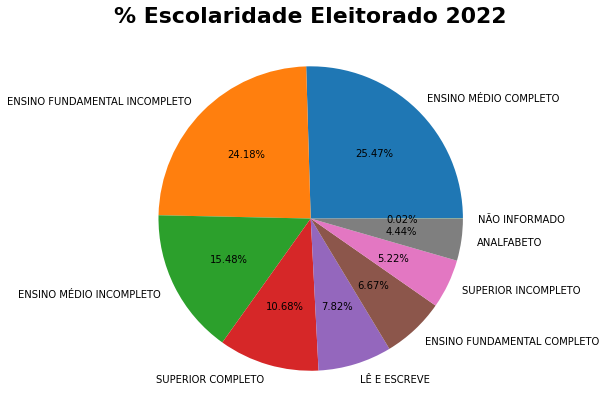

In [88]:
plt.figure(figsize=(15,7))
plt.title(f'% Escolaridade Eleitorado {eleicao_ano}',fontdict=title_font)

plt.pie(schooling_totals['PCTG'], labels=schooling_totals['DS_GRAU_ESCOLARIDADE'], 
        autopct='%2.2f%%')

plt.show()

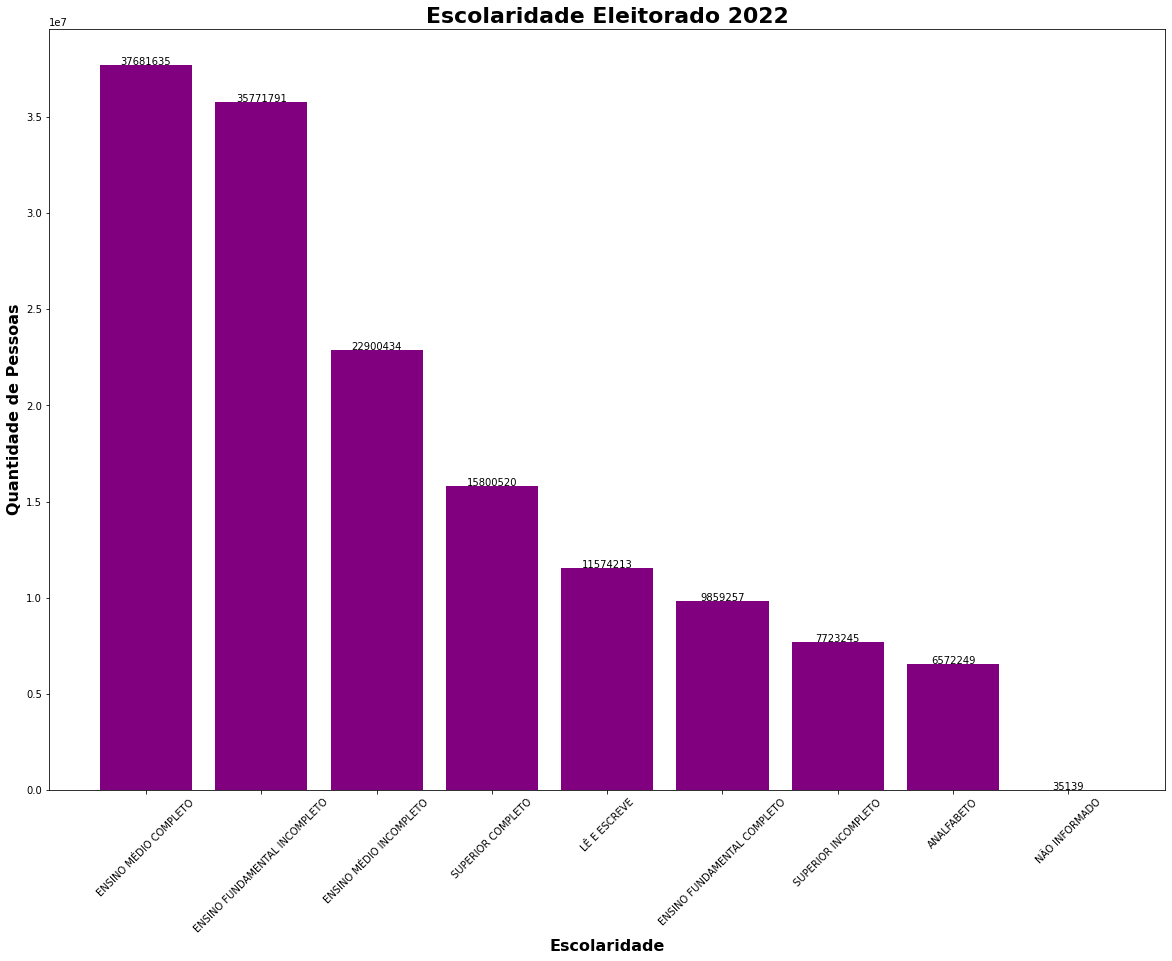

In [107]:
plt.figure(figsize=(20,14))
x = schooling_totals['DS_GRAU_ESCOLARIDADE'].to_list()
y = schooling_totals['QT_ELEITORES_PERFIL'].to_list()
plt.bar(x,y,color='purple')

add_labels(x, y)
plt.title(f'Escolaridade Eleitorado {eleicao_ano}',fontdict=title_font)
plt.xlabel('Escolaridade',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.xticks(rotation=45)

plt.show()

In [48]:
age_group = df_perfil_eleitorado.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().reset_index()
age_group['PCTG'] = (age_group.QT_ELEITORES_PERFIL / age_group.QT_ELEITORES_PERFIL.sum()) * 100
age_group = age_group.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
age_group

,DS_FAIXA_ETARIA,QT_ELEITORES_PERFIL,PCTG
9,35 a 39 anos,15938174,10.774971
8,30 a 34 anos,15423585,10.427084
7,25 a 29 anos,15178770,10.261578
10,40 a 44 anos,14748141,9.970452
11,45 a 49 anos,12979183,8.774551
6,21 a 24 anos,12349829,8.349078
12,50 a 54 anos,12147351,8.212193
13,55 a 59 anos,11198821,7.570941
14,60 a 64 anos,9372283,6.336114
15,65 a 69 anos,7350599,4.969358


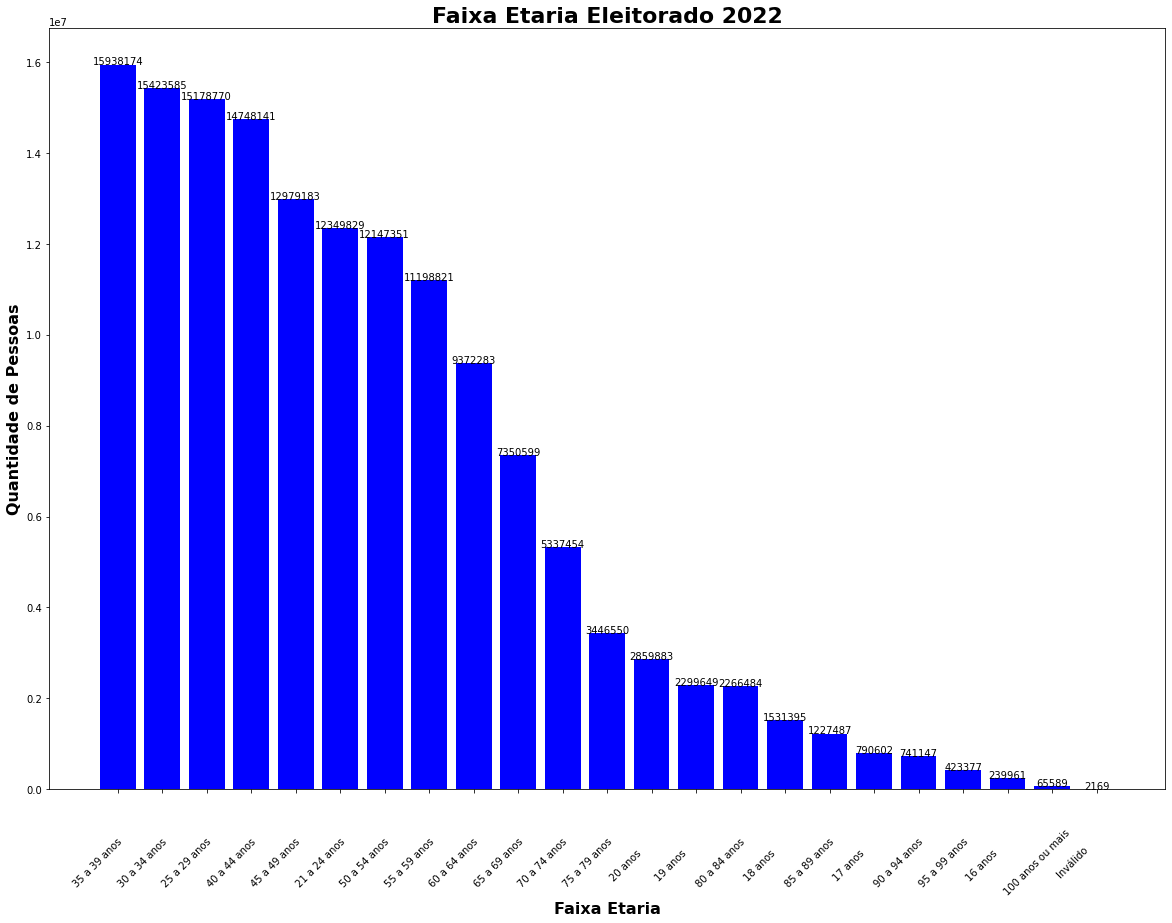

In [108]:
plt.figure(figsize=(20,14))
x = age_group['DS_FAIXA_ETARIA'].to_list()
y = age_group['QT_ELEITORES_PERFIL'].to_list()
plt.bar(x,y,color='b')

add_labels(x, y)
plt.title(f'Faixa Etaria Eleitorado {eleicao_ano}',fontdict=title_font)

plt.xticks(rotation=45)
plt.xlabel('Faixa Etaria',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.show()

In [50]:
total_eleitores = df_perfil_eleitorado.QT_ELEITORES_PERFIL.sum()
eleitores_nm_social = df_perfil_eleitorado.QT_ELEITORES_INC_NM_SOCIAL.sum()
pct_social_name_used = (eleitores_nm_social/total_eleitores)*100

print(f'Apenas {round(pct_social_name_used,4)}% usam nome social')

Apenas 0.0068% usam nome social


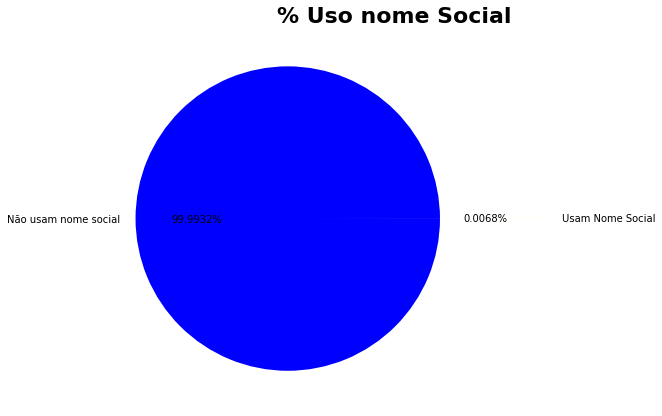

In [51]:
plt.figure(figsize=(15,7))
plt.title('% Uso nome Social',fontdict=title_font)
plt.pie([pct_social_name_used, 100-pct_social_name_used], explode=[0,0.7], labels=['Usam Nome Social', 'Não usam nome social'], autopct='%2.4f%%', colors=['yellow','blue'])
plt.show()

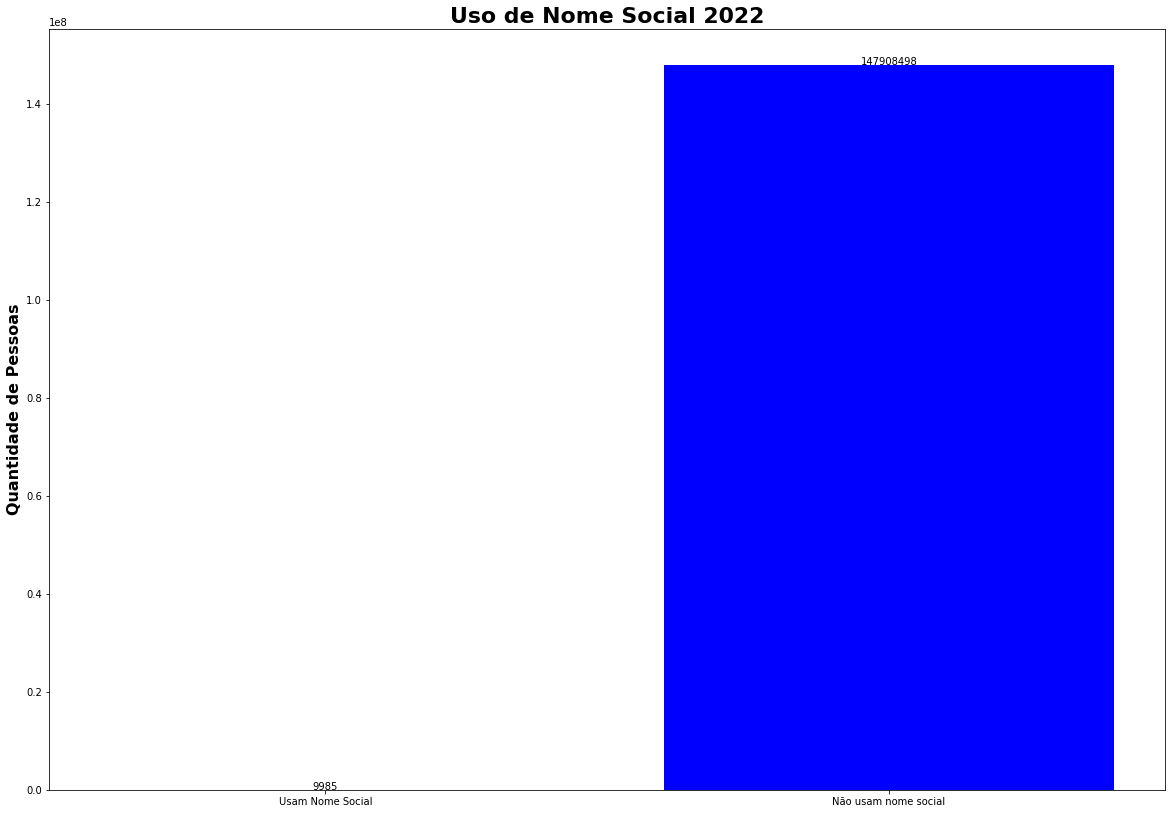

In [109]:
plt.figure(figsize=(20,14))

x = ['Usam Nome Social', 'Não usam nome social']
y = [eleitores_nm_social, total_eleitores-eleitores_nm_social]

plt.bar(x,y,color='b')

add_labels(x, y)
plt.title(f'Uso de Nome Social {eleicao_ano}',fontdict=title_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.show()

[Back to the top](#index)

<a name="analysis_2"></a>
## 4.2 - Relacionar as características do eleitorado de acordo com o representante eleito em determinada região; 
[Back to the top](#index)

In [52]:
gender_totals = df_perfil_eleitorado.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum().reset_index()
gender_totals['PCTG'] = (gender_totals.QT_ELEITORES_PERFIL / gender_totals.QT_ELEITORES_PERFIL.sum()) * 100
gender_totals

,DS_GENERO,QT_ELEITORES_PERFIL,PCTG
0,FEMININO,77649569,52.494839
1,MASCULINO,70228457,47.477810
2,NÃO INFORMADO,40457,0.027351


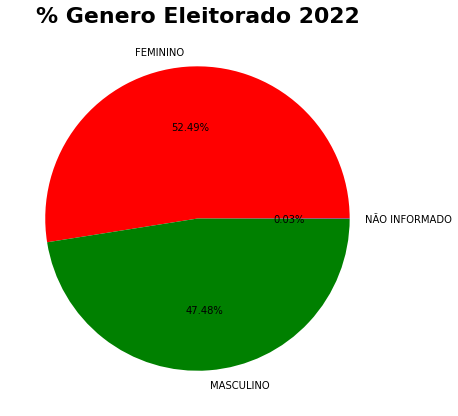

In [53]:
plt.figure(figsize=(15,7))
plt.title(f'% Genero Eleitorado {eleicao_ano}',fontdict=title_font)

plt.pie(gender_totals['PCTG'], labels=gender_totals['DS_GENERO'], autopct='%2.2f%%', colors=['red','green', 'blue'])
plt.show()

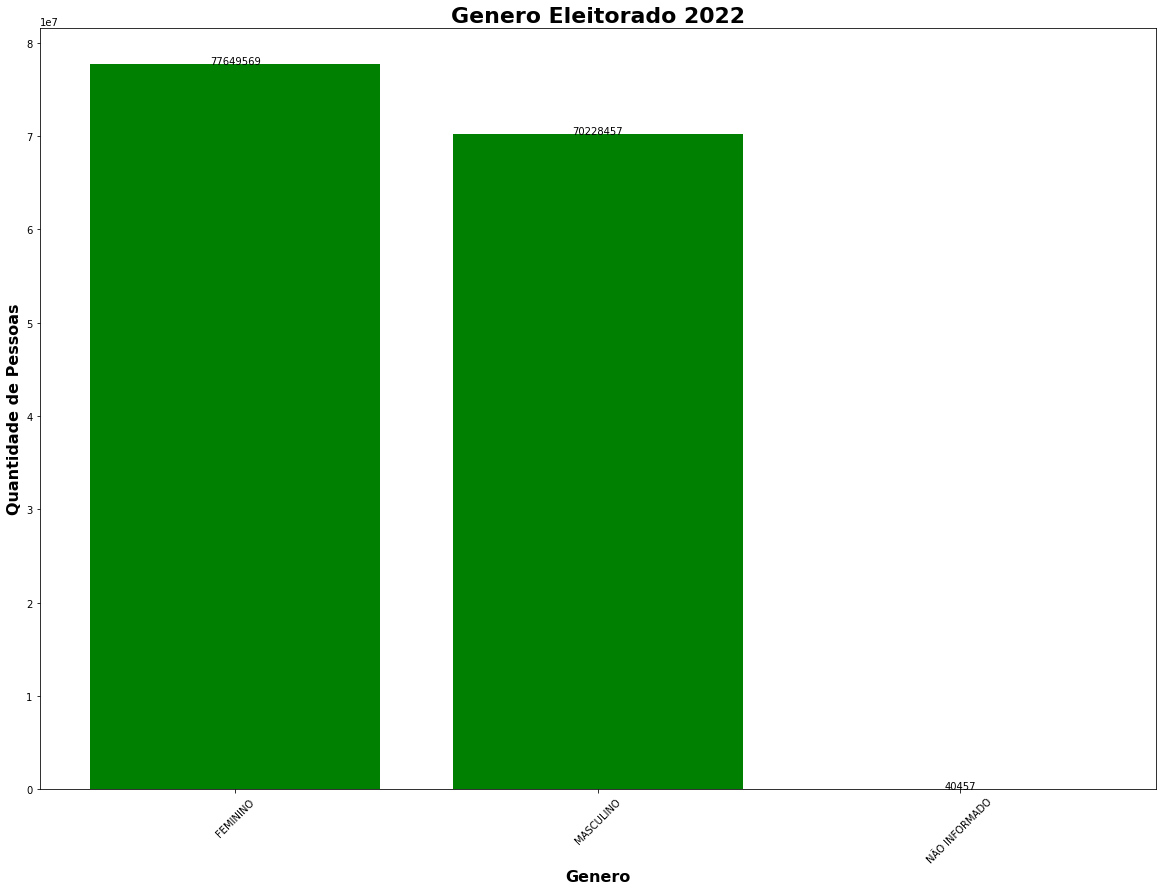

In [110]:
plt.figure(figsize=(20,14))
x = gender_totals['DS_GENERO'].to_list()
y = gender_totals['QT_ELEITORES_PERFIL'].to_list()
plt.bar(x,y,color='green')

add_labels(x, y)
plt.title(f'Genero Eleitorado {eleicao_ano}',fontdict=title_font)

plt.xticks(rotation=45)
plt.xlabel('Genero',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.show()

In [56]:
eleitores_biometria = df_perfil_eleitorado.QT_ELEITORES_BIOMETRIA.sum()
pct_biometry_used = (eleitores_biometria/total_eleitores)*100

print(f'{round(pct_biometry_used,2)}% usam biometria')


79.5% usam biometria


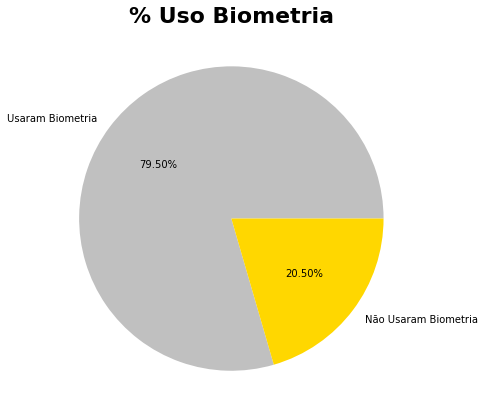

In [57]:
plt.figure(figsize=(15,7))
plt.title('% Uso Biometria',fontdict=title_font)
plt.pie([pct_biometry_used, 100-pct_biometry_used], labels=['Usaram Biometria', 'Não Usaram Biometria'], autopct='%2.2f%%', colors=['silver','gold'])
plt.show()

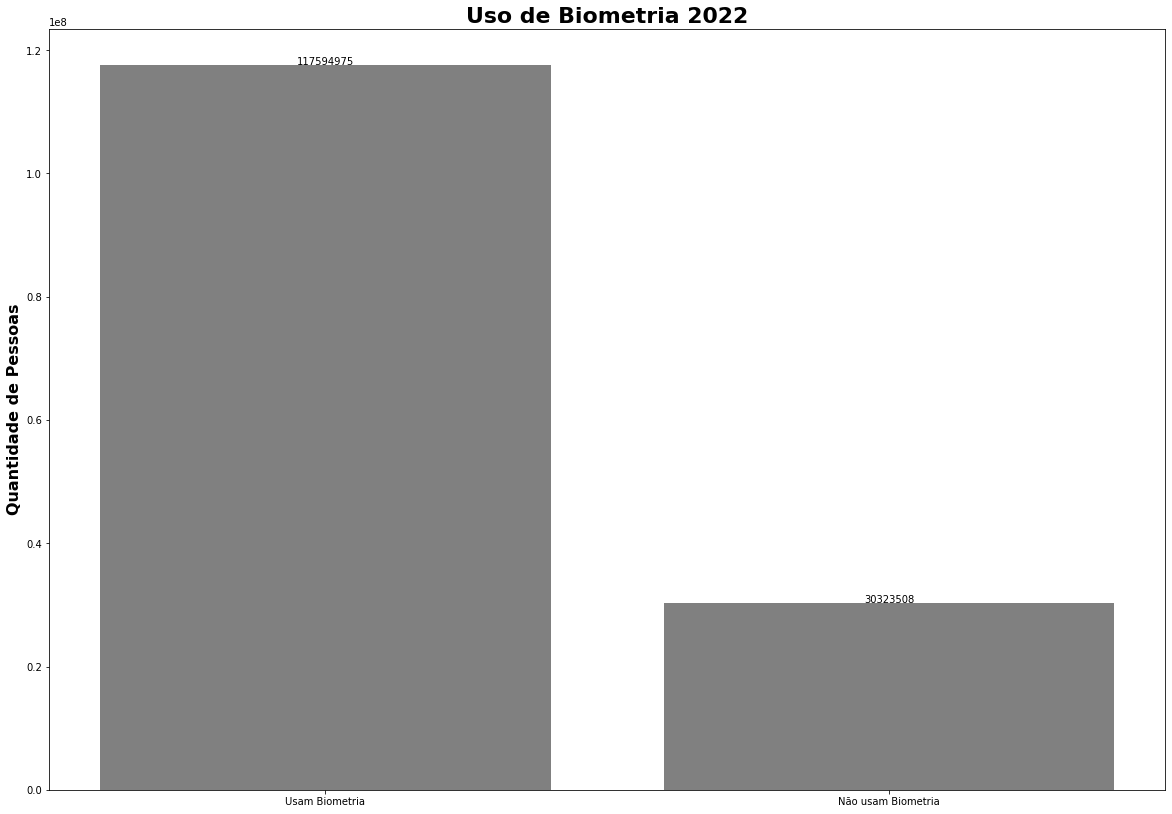

117594975

In [112]:
plt.figure(figsize=(20,14))

x = ['Usam Biometria', 'Não usam Biometria']
y = [eleitores_biometria, total_eleitores-eleitores_biometria]

plt.bar(x,y,color='grey')

add_labels(x, y)
plt.title(f'Uso de Biometria {eleicao_ano}',fontdict=title_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.show()
eleitores_biometria

<a name="analysis_3"></a>
## 4.3 - Mostrar a renda média do eleitorado de determinada região; 
[Back to the top](#index)

### 4.3.1 - Cobertura Vanguarda

In [58]:
df_renda_mun_ac = df_renda_mun.copy()
# ajustando nomes das cidade para maiusculo para faciliar a query
df_renda_mun_ac.Localidade = df_renda_mun_ac.Localidade.str.upper()
df_renda_mun_ac = df_renda_mun_ac.query(f'Nome == "Salário médio mensal" & Localidade == @all_cities_cobertura_vanguarda')
df_renda_mun_ac = df_renda_mun_ac.drop(columns=['Nome', 'Posição', 'Multiplicador', 
                                              'Unidade', '2006', '2007', 'Localidade']).reset_index().drop(columns=['index'])
df_renda_media_ac = df_renda_mun_ac.mean(axis=0).reset_index()
df_renda_media_ac = df_renda_media_ac.rename(columns={"index": "Ano", 0: "Média"})
df_renda_media_ac

,Ano,Média
0,2008,2.662791
1,2009,2.616279
2,2010,2.548837
3,2011,2.572093
4,2012,2.423256
5,2013,2.395349
6,2014,2.402326
7,2015,2.383721
8,2016,2.306977
9,2017,2.320930


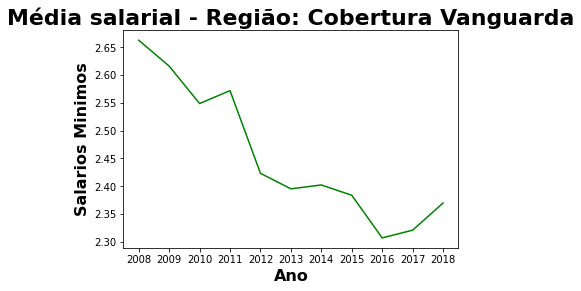

In [59]:
plt.title('Média salarial - Região: Cobertura Vanguarda',fontdict=title_font)
plt.plot(df_renda_media_ac.Ano, df_renda_media_ac.Média, color='g')
plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Salarios Minimos',fontdict=label_font)
plt.show()

### 4.3.2 - Municipio #1

In [60]:
df_renda_mun_1 = df_renda_mun.copy()
# ajustando nomes das cidade para maiusculo para faciliar a query
df_renda_mun_1.Localidade = df_renda_mun_1.Localidade.str.upper()
df_renda_mun_1 = df_renda_mun_1.query(f'Nome == "Salário médio mensal" & Localidade == "{municipio_1}"')
df_renda_mun_1 = df_renda_mun_1.drop(columns=['Nome', 'Posição', 'Multiplicador', 
                                              'Unidade', '2006', '2007', 'Localidade']).reset_index().drop(columns=['index'])
df_renda_media_mun_1 = df_renda_mun_1.mean(axis=0).reset_index()
df_renda_media_mun_1 = df_renda_media_mun_1.rename(columns={"index": "Ano", 0: "Média"})
df_renda_media_mun_1

,Ano,Média
0,2008,4.0
1,2009,3.8
2,2010,3.6
3,2011,3.7
4,2012,3.5
5,2013,3.5
6,2014,3.4
7,2015,3.3
8,2016,3.2
9,2017,3.2


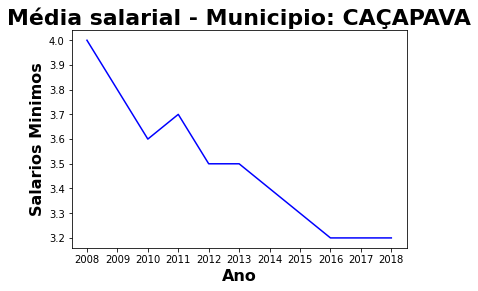

In [61]:
plt.title(f'Média salarial - Municipio: {municipio_1}',fontdict=title_font)
plt.plot(df_renda_media_mun_1.Ano, df_renda_media_mun_1.Média, color='b')
plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Salarios Minimos',fontdict=label_font)
plt.show()

<a name="analysis_4"></a>
## 4.4 -  Mostrar, daquela região, a cidade com mais eleitores jovem e mais eleitores idosos;
[Back to the top](#index)

In [62]:
# consultando as faixas etarias
df_perfil_eleitorado['DS_FAIXA_ETARIA'].unique().tolist()

['90 a 94 anos                  ',
 '95 a 99 anos                  ',
 '100 anos ou mais              ',
 'Inválido                      ',
 '25 a 29 anos                  ',
 '30 a 34 anos                  ',
 '35 a 39 anos                  ',
 '40 a 44 anos                  ',
 '45 a 49 anos                  ',
 '50 a 54 anos                  ',
 '55 a 59 anos                  ',
 '60 a 64 anos                  ',
 '65 a 69 anos                  ',
 '70 a 74 anos                  ',
 '75 a 79 anos                  ',
 '80 a 84 anos                  ',
 '85 a 89 anos                  ',
 '17 anos                       ',
 '18 anos                       ',
 '19 anos                       ',
 '20 anos                       ',
 '21 a 24 anos                  ',
 '16 anos                       ']

In [63]:
def top_5_cities_most_old_voters(df_perfil_eleitorado):
    df_perfil_eleitorado_old = df_perfil_eleitorado.query(f'DS_FAIXA_ETARIA.str.contains("90 a 94 anos") '
                                                    'or DS_FAIXA_ETARIA.str.contains("95 a 99 anos") '
                                                    'or DS_FAIXA_ETARIA.str.contains("85 a 89 anos") '
                                                     )
    df_perfil_eleitorado_old

    df_perfil_eleitorado_old = df_perfil_eleitorado_old.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum().reset_index()
    df_perfil_eleitorado_old = df_perfil_eleitorado_old.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
    return df_perfil_eleitorado_old.head(5)

def top_5_cities_most_young_voters(df_perfil_eleitorado):
    df_perfil_eleitorado_young = df_perfil_eleitorado.query(f'DS_FAIXA_ETARIA.str.contains("16 anos") '
                                                      'or DS_FAIXA_ETARIA.str.contains("17 anos") '
                                                      'or DS_FAIXA_ETARIA.str.contains("18 anos") '
                                                      'or DS_FAIXA_ETARIA.str.contains("19 anos") '
                                                      'or DS_FAIXA_ETARIA.str.contains("20 anos") '
                                                      'or DS_FAIXA_ETARIA.str.contains("21 a 24 anos") '
                                                         )
    df_perfil_eleitorado_young

    df_perfil_eleitorado_young = df_perfil_eleitorado_young.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum().reset_index()
    df_perfil_eleitorado_young = df_perfil_eleitorado_young.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
    return df_perfil_eleitorado_young.head(5)
    

### 4.4.1 - Comparação à nível Brasil

In [64]:
top_5_cities_most_old_voters(df_perfil_eleitorado)

,NM_MUNICIPIO,QT_ELEITORES_PERFIL
4751,SÃO PAULO,226987
3982,RIO DE JANEIRO,217102
526,BELO HORIZONTE,58979
1708,FORTALEZA,39207
3721,PORTO ALEGRE,33077


In [65]:
top_5_cities_most_young_voters(df_perfil_eleitorado)

,NM_MUNICIPIO,QT_ELEITORES_PERFIL
4751,SÃO PAULO,1031224
3982,RIO DE JANEIRO,512908
1708,FORTALEZA,240615
4103,SALVADOR,222024
2724,MANAUS,217449


### 4.4.2 - Comparação à nível Região Estudada (vale do paraiba)

In [66]:
# filtrando regiões do vale do paraiba
df_perfil_eleitorado_vale = df_perfil_eleitorado.copy()
# ajustando nomes das cidade para maiusculo para faciliar a query
df_perfil_eleitorado_vale.NM_MUNICIPIO = df_perfil_eleitorado_vale.NM_MUNICIPIO.str.upper()
df_perfil_eleitorado_vale = df_perfil_eleitorado_vale.query(f'NM_MUNICIPIO == @macro_regiao["VALE DO PARAÍBA"]')

In [67]:
top_5_cities_most_old_voters(df_perfil_eleitorado_vale)

,NM_MUNICIPIO,QT_ELEITORES_PERFIL
19,SÃO JOSÉ DOS CAMPOS,7567
21,TAUBATÉ,5059
7,JACAREÍ,2844
5,GUARATINGUETÁ,1760
13,PINDAMONHANGABA,1714


In [68]:
top_5_cities_most_young_voters(df_perfil_eleitorado_vale)

,NM_MUNICIPIO,QT_ELEITORES_PERFIL
19,SÃO JOSÉ DOS CAMPOS,65560
21,TAUBATÉ,25108
7,JACAREÍ,20673
13,PINDAMONHANGABA,14752
5,GUARATINGUETÁ,10644


<a name="analysis_5"></a>
## 4.5 -  Comparar a renda média de eleitores do Vale do Paraíba com a de outras regiões do Estado;
[Back to the top](#index)

In [69]:
df_renda_vale_paraiba = df_renda_mun.copy()
# ajustando nomes das cidade para maiusculo para faciliar a query
df_renda_vale_paraiba.Localidade = df_renda_vale_paraiba.Localidade.str.upper()

df_renda_vale_paraiba = df_renda_vale_paraiba.query(f'Nome == "Salário médio mensal" & Localidade == @macro_regiao["VALE DO PARAÍBA"]')
df_renda_vale_paraiba = df_renda_vale_paraiba.drop(columns=['Nome', 
                                              'Posição', 
                                              'Multiplicador', 
                                              'Unidade', 
                                              '2006', 
                                              '2007', 
                                              'Localidade']).reset_index().drop(columns=['index'])

df_renda_media_vale_paraiba = df_renda_vale_paraiba.mean(axis=0).reset_index()
df_renda_media_vale_paraiba = df_renda_media_vale_paraiba.rename(columns={"index": "Ano", 0: "Vale do Paraíba"})
df_renda_media_vale_paraiba = df_renda_media_vale_paraiba.round(2)
df_renda_media_vale_paraiba

,Ano,Vale do Paraíba
0,2008,2.95
1,2009,2.89
2,2010,2.79
3,2011,2.80
4,2012,2.62
5,2013,2.59
6,2014,2.60
7,2015,2.57
8,2016,2.47
9,2017,2.44


In [70]:
df_renda_resto = df_renda_mun.copy()
# ajustando nomes das cidade para maiusculo para faciliar a query
df_renda_resto.Localidade = df_renda_resto.Localidade.str.upper()

df_renda_resto = df_renda_resto.query(f'Nome == "Salário médio mensal" & Localidade != @macro_regiao["VALE DO PARAÍBA"]')
df_renda_resto = df_renda_resto.drop(columns=['Nome', 
                                              'Posição', 
                                              'Multiplicador', 
                                              'Unidade', 
                                              '2006', 
                                              '2007', 
                                              'Localidade']).reset_index().drop(columns=['index'])

df_renda_media_resto = df_renda_resto.mean(axis=0).reset_index()
df_renda_media_resto = df_renda_media_resto.rename(columns={"index": "Ano", 0: "Demais Regiões"})
df_renda_media_resto = df_renda_media_resto.round(2)
df_renda_media_resto

,Ano,Demais Regiões
0,2008,2.63
1,2009,2.55
2,2010,2.48
3,2011,2.51
4,2012,2.41
5,2013,2.41
6,2014,2.46
7,2015,2.42
8,2016,2.35
9,2017,2.36


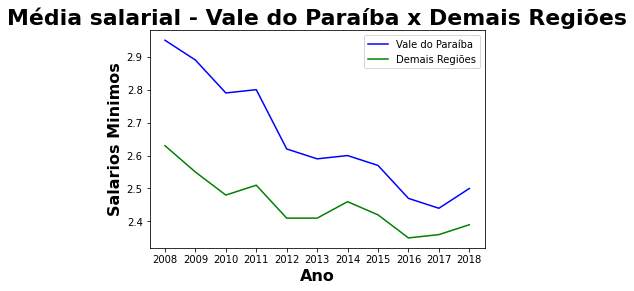

In [71]:
plt.title(f'Média salarial - Vale do Paraíba x Demais Regiões',fontdict=title_font)
plt.plot(df_renda_media_vale_paraiba.Ano, df_renda_media_vale_paraiba["Vale do Paraíba"], 
         color='b', label='Vale do Paraíba')
plt.plot(df_renda_media_resto.Ano, df_renda_media_resto["Demais Regiões"],
         color='g', label='Demais Regiões')
plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Salarios Minimos',fontdict=label_font)
plt.legend()

plt.show()

<a name="analysis_6"></a>
## 4.6 - Automatizar a exportação das estatísticas;
[Back to the top](#index)

Está função visa possibilitar a exportação dos data frames criados para CSV.
Para configurar exportação dos data frames basta alterar a config deste notebook [aqui](#export_to_csv).

In [ ]:
def export_df_to_csv(df, csv_name):
    os.makedirs('exported_csv', exist_ok=True)
    df.to_csv(f'exported_csv/{csv_name}.csv',
                     sep=';',
                     index=False)

<a name="analysis_7"></a>
## 4.7 - Relacionar características do eleitorado de acordo com o representante eleito em determinada região de eleições futuras;
[Back to the top](#index)

In [74]:
# este item esta espalhado pelo código do notebook para que seja 
# possivel ver anos futuros (2022 e 2024) sem necessidade de 
# ajustes no código, apenas baixando os CSV's e configurando o ano desejado

<a name="analysis_8"></a>
## 4.8 - Mostrar a percentagem de eleitores ausentes da última eleição;
[Back to the top](#index)

In [75]:
df_abstencao.head(5)

,NR_TURNO,NM_MUNICIPIO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO
0,2,SÃO PAULO,269,65,204
1,2,SÃO PAULO,78,3,75
2,2,SÃO PAULO,2,0,2
3,2,SÃO PAULO,1,1,0
4,2,SÃO PAULO,2,2,0


In [76]:
def print_percentage(number):
    return round(number*100,2)

In [77]:
total = df_abstencao.QT_APTOS.sum()
total_comparecimento = df_abstencao.QT_COMPARECIMENTO.sum()
total_abstencao = df_abstencao.QT_ABSTENCAO.sum()

pctg_comparecimento = print_percentage(total_comparecimento/total)
pctg_abstencao = print_percentage(total_abstencao/total)

print(f'{pctg_abstencao}% da população esteve ausente nas eleições de {eleicao_ano}')
print(f'{pctg_comparecimento}% da população esteve presente nas eleições de {eleicao_ano}')

24.47% da população esteve ausente nas eleições de 2022
75.53% da população esteve presente nas eleições de 2022


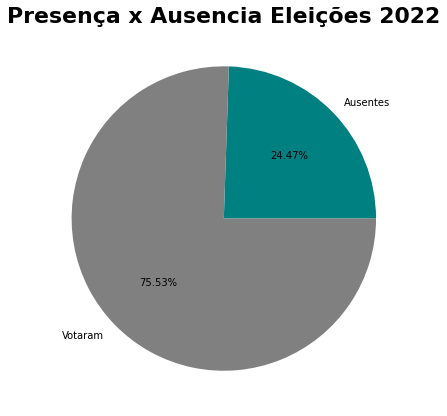

In [78]:
plt.figure(figsize=(15,7))
plt.title(f'Presença x Ausência Eleições {eleicao_ano}',fontdict=title_font)
plt.pie([pctg_abstencao, pctg_comparecimento], labels=['Ausentes', 'Votaram'], autopct='%2.2f%%', colors=['teal','gray'])
plt.show()

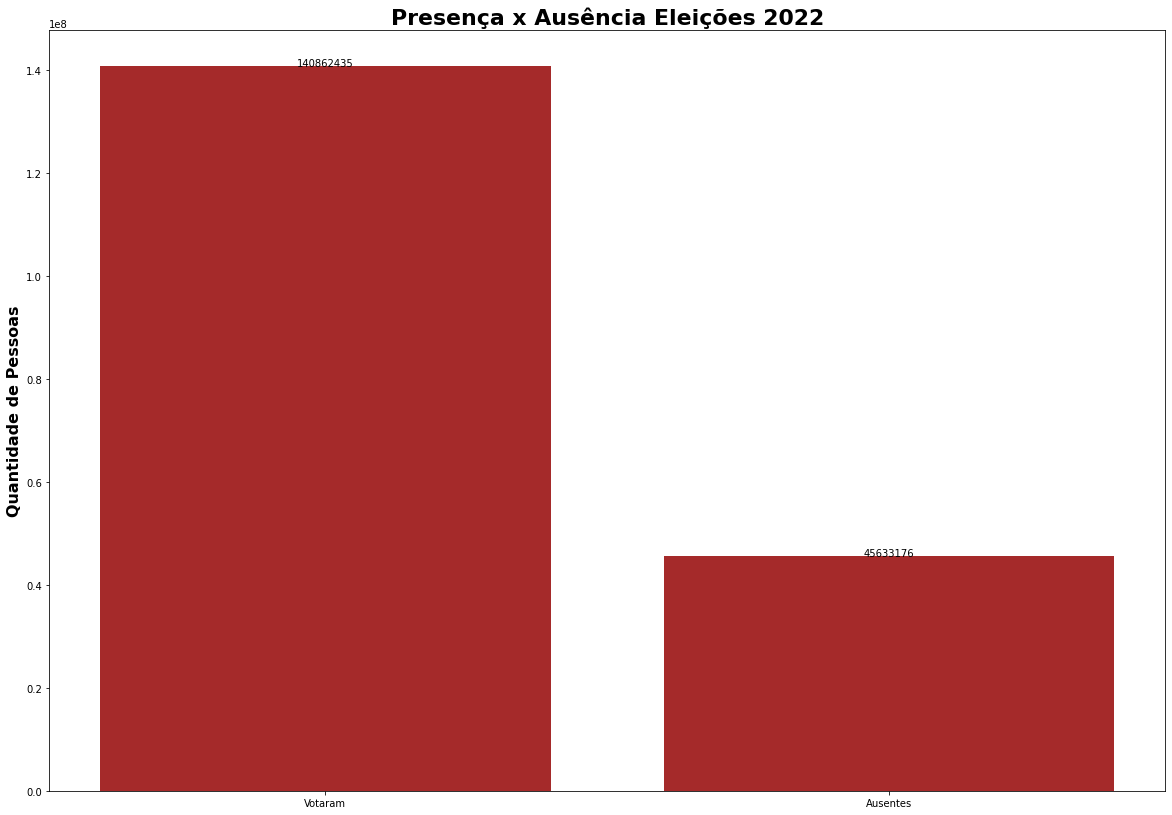

In [114]:
plt.figure(figsize=(20,14))
x = ['Votaram', 'Ausentes']
y = [total_comparecimento, total_abstencao]
plt.bar(x,y,color='brown')

add_labels(x, y)
plt.title(f'Presença x Ausência Eleições {eleicao_ano}',fontdict=title_font)

plt.ylabel('Quantidade de Pessoas',fontdict=label_font)
plt.show()

<a name="analysis_9"></a>
## 4.9 - Mostrar a evolução do número de eleitores;
[Back to the top](#index)

### 4.9.1 - Brasil

In [79]:
eleitores_2014 = df_eleitorado_2014.QTD_ELEITORES.sum()
eleitores_2016 = df_eleitorado_2016.QTD_ELEITORES.sum()
eleitores_2018 = df_eleitorado_2018.QTD_ELEITORES.sum()
eleitores_2020 = df_eleitorado_2020.QTD_ELEITORES.sum()
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    eleitores_2022 = df_eleitorado_2022.QTD_ELEITORES.sum()
if eleicao_ano >= 2024:
    eleitores_2024 = df_eleitorado_2024.QTD_ELEITORES.sum()

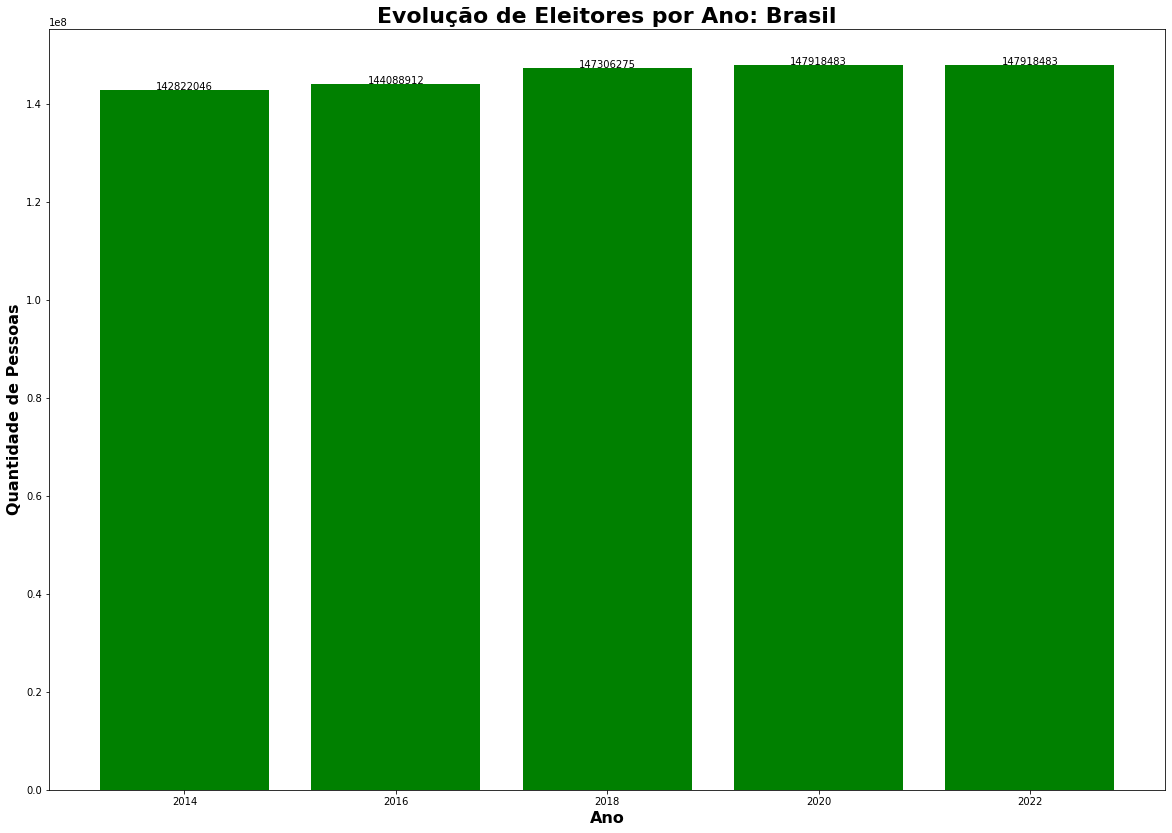

In [80]:
plt.figure(figsize=(20,14))

x = ['2014','2016','2018','2020']
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    x.append('2022')
if eleicao_ano >= 2024:
    x.append('2024')

y = [eleitores_2014, eleitores_2016, eleitores_2018, eleitores_2020]
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    y.append(eleitores_2022)
if eleicao_ano >= 2024:
    y.append(eleitores_2024)

plt.bar(x,y,color='g')

add_labels(x, y)
plt.title(f'Evolução de Eleitores por Ano: Brasil',fontdict=title_font)

plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)

plt.show()

### 4.9.2 - Vale do Paraíba

In [81]:
eleitores_2014_vale = df_eleitorado_2014.query(f'NM_MUNICIPIO == @all_cities_cobertura_vanguarda').QTD_ELEITORES.sum()
eleitores_2016_vale = df_eleitorado_2016.query(f'NM_MUNICIPIO == @all_cities_cobertura_vanguarda').QTD_ELEITORES.sum()
eleitores_2018_vale = df_eleitorado_2018.query(f'NM_MUNICIPIO == @all_cities_cobertura_vanguarda').QTD_ELEITORES.sum()
eleitores_2020_vale = df_eleitorado_2020.query(f'NM_MUNICIPIO == @all_cities_cobertura_vanguarda').QTD_ELEITORES.sum()
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    eleitores_2022_vale = df_eleitorado_2022.query(f'NM_MUNICIPIO == @all_cities_cobertura_vanguarda').QTD_ELEITORES.sum()
if eleicao_ano >= 2024:
    eleitores_2024_vale = df_eleitorado_2024.query(f'NM_MUNICIPIO == @all_cities_cobertura_vanguarda').QTD_ELEITORES.sum()

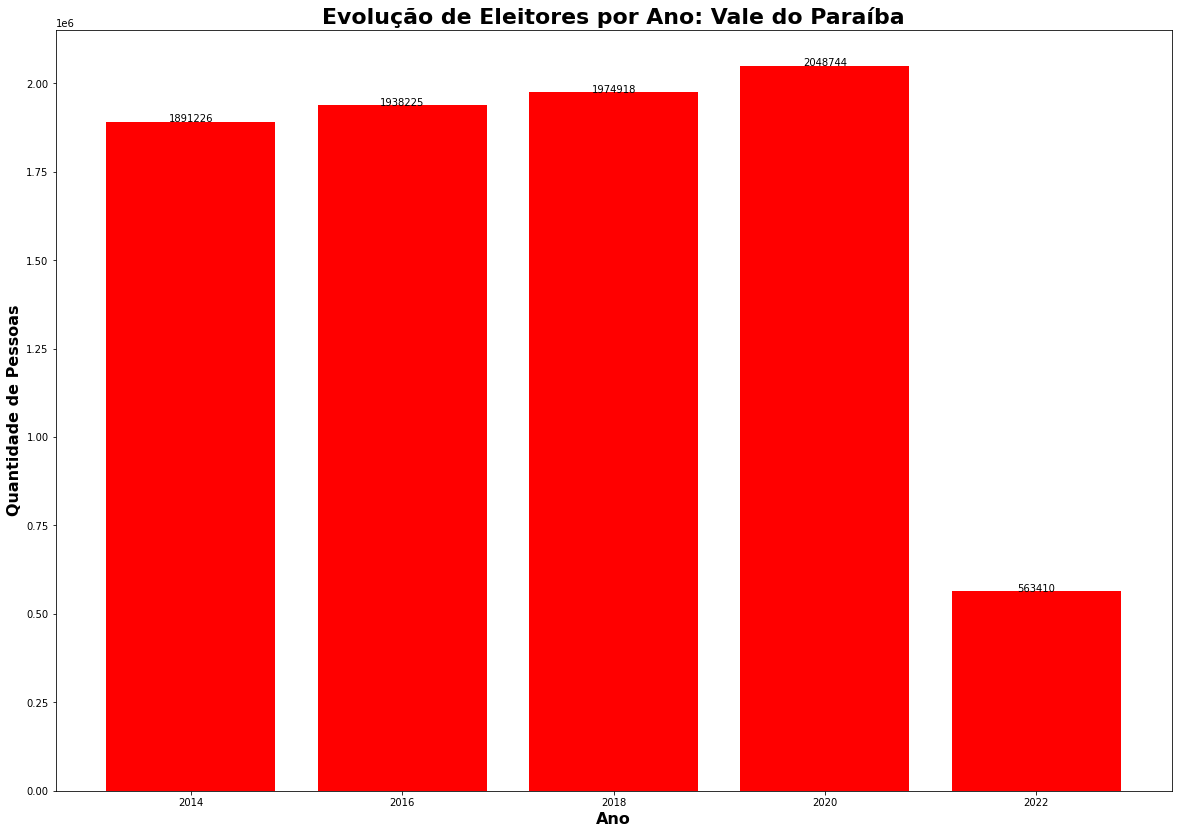

In [82]:
plt.figure(figsize=(20,14))

x = ['2014','2016','2018','2020']
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    x.append('2022')
if eleicao_ano >= 2024:
    x.append('2024')
    
y = [eleitores_2014_vale, eleitores_2016_vale, eleitores_2018_vale, eleitores_2020_vale]
if eleicao_ano >= 2022:
    y.append(eleitores_2022_vale)
if eleicao_ano >= 2024:
    y.append(eleitores_2024_vale)

plt.bar(x,y,color='r')

add_labels(x, y)
plt.title(f'Evolução de Eleitores por Ano: Vale do Paraíba',fontdict=title_font)

plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)

plt.show()

### 4.9.3 - Município # 1

In [83]:
eleitores_2014_mun1 = df_eleitorado_2014.query(f'NM_MUNICIPIO == "{municipio_1}"').QTD_ELEITORES.sum()
eleitores_2016_mun1 = df_eleitorado_2016.query(f'NM_MUNICIPIO == "{municipio_1}"').QTD_ELEITORES.sum()
eleitores_2018_mun1 = df_eleitorado_2018.query(f'NM_MUNICIPIO == "{municipio_1}"').QTD_ELEITORES.sum()
eleitores_2020_mun1 = df_eleitorado_2020.query(f'NM_MUNICIPIO == "{municipio_1}"').QTD_ELEITORES.sum()
if eleicao_ano >= 2022:
    eleitores_2022_mun1 = df_eleitorado_2022.query(f'NM_MUNICIPIO == "{municipio_1}"').QTD_ELEITORES.sum()
if eleicao_ano >= 2024:
    eleitores_2024_mun1 = df_eleitorado_2024.query(f'NM_MUNICIPIO == "{municipio_1}"').QTD_ELEITORES.sum()

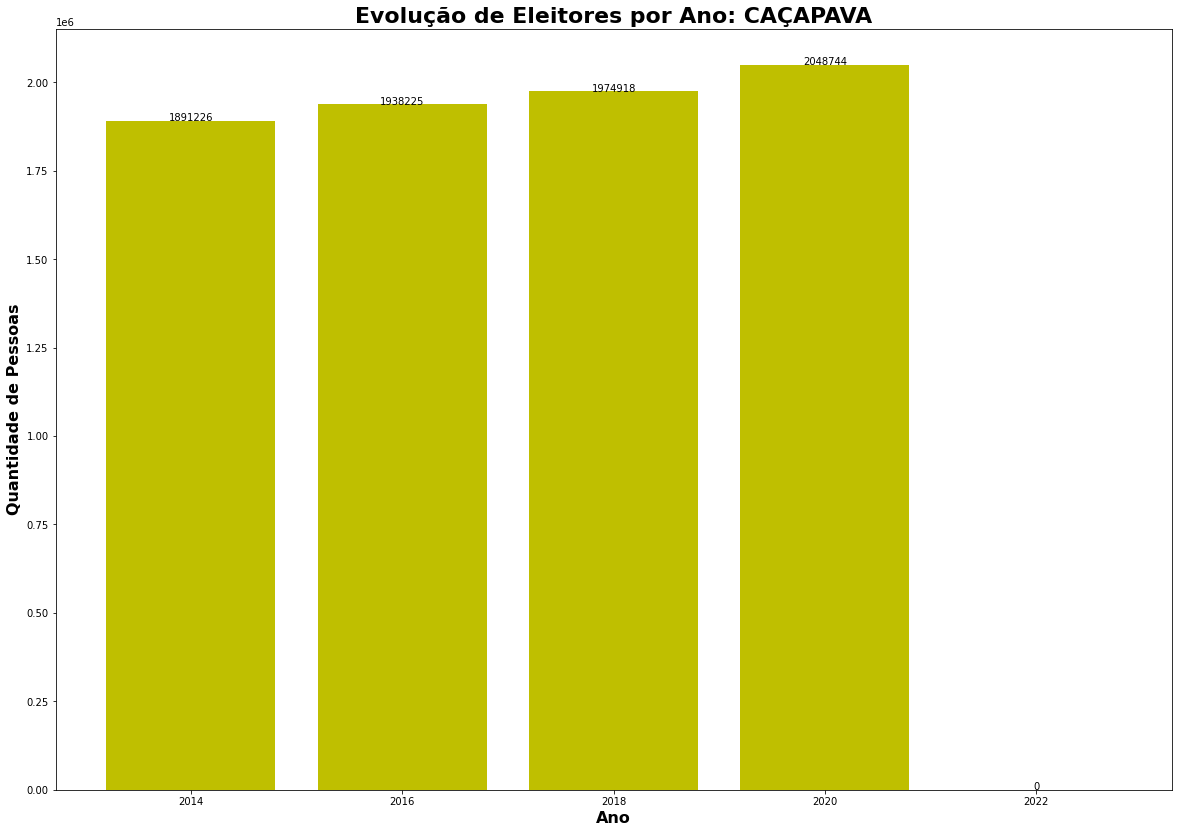

In [84]:
plt.figure(figsize=(20,14))
x = ['2014','2016','2018','2020']
# preparando a analise para eleições futuras
if eleicao_ano >= 2022:
    x.append('2022')
if eleicao_ano >= 2024:
    x.append('2024')
y = [eleitores_2014_mun1, eleitores_2016_mun1, eleitores_2018_mun1, eleitores_2020_mun1]

y = [eleitores_2014_vale, eleitores_2016_vale, eleitores_2018_vale, eleitores_2020_vale]
if eleicao_ano >= 2022:
    y.append(eleitores_2022_mun1)
if eleicao_ano >= 2024:
    y.append(eleitores_2024_mun1)
    
plt.bar(x,y,color='y')

add_labels(x, y)
plt.title(f'Evolução de Eleitores por Ano: {municipio_1}',fontdict=title_font)

plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Quantidade de Pessoas',fontdict=label_font)

plt.show()

<a name="exporting"></a>
# 5 - Exportando para CSV (caso configurado)
[Back to the top](#index)


In [85]:
if EXPORT_TO_CSV == 'N':
    print('Exportação não realizada. Thats all folks')
else:
    export_df_to_csv(marital_status_totals, 'estado_civil_eleitorado')
    export_df_to_csv(schooling_totals, 'escolaridade_eleitorado')
    export_df_to_csv(age_group, 'faixa_etaria_eleitorado')
    export_df_to_csv(gender_totals, 'genero_eleitorado')
    export_df_to_csv(df_renda_media_ac, 'renda_media_cidades_vanguarda')
    export_df_to_csv(df_renda_media_mun_1, f'renda_media_{municipio_1}')
    export_df_to_csv(df_renda_media_vale_paraiba, 'renda_media_vale_paraiba')
    export_df_to_csv(df_renda_media_resto, 'renda_media_demais_regioes')

Exportação não realizada. Thats all folks
